In [6]:
import numpy as np
import tensorflow as tf
from focal_loss import clip_boundaries, BinaryFocalLoss
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.1.0


## Focal loss

gamma_candidates = \[0, 0.5, 1, 2, 5\]

### BinaryFocalLoss

Binary logits mode, in this mode, the prediction tensor is a rank-2 tensor with two probabilities, such as:

y_pred = \[0.1, 0.9\] for predict the y_true = \[0., 1.\]

In [7]:
# focal loss paramaters
alpha=0.99
gamma=1
fl = BinaryFocalLoss(alpha=alpha, gamma=gamma)

In [8]:
y_pred = [0.1, 0.9]
y_true = [0., 1.]

In [9]:
fl(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.005268028>

In [14]:

# Using 'auto'/'sum_over_batch_size' reduction type.

print(f"fl: {fl(y_true, y_pred).numpy()}")

fl: 0.27488723397254944


In [10]:
alpha = 1
gamma = 0
fl_0 = BinaryFocalLoss(alpha=alpha, gamma=0)
fl_0_5 = BinaryFocalLoss(alpha=alpha, gamma=0.5)
fl_1 = BinaryFocalLoss(alpha=alpha, gamma=1)
fl_2 = BinaryFocalLoss(alpha=alpha, gamma=2)
fl_5 = BinaryFocalLoss(alpha=alpha, gamma=5)

### class 0 is positive

In [7]:
# class 0 label, class 1 label
y_true = np.asarray([0., 1.])
p = np.linspace(0.00000001, 0.999, 1000)
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

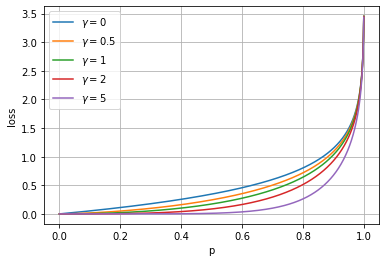

In [9]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("loss")
plt.legend()
plt.grid()

### class 1 is positive

In [10]:
# class 0 label, class 1 label
y_true = np.asarray([1., 0.])
p = np.linspace(0.00000001, 0.999, 1000)
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

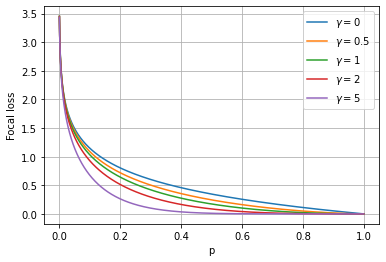

In [23]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("Focal loss")
plt.legend()
plt.grid()

### Test alpha $\alpha$

alpha=0.25

In [19]:
alpha = 1.0 # weight for positive class
fl_0 = BinaryFocalLoss(alpha=alpha, gamma=0)
fl_0_5 = BinaryFocalLoss(alpha=alpha, gamma=0.5)
fl_1 = BinaryFocalLoss(alpha=alpha, gamma=1)
fl_2 = BinaryFocalLoss(alpha=alpha, gamma=2)
fl_5 = BinaryFocalLoss(alpha=alpha, gamma=5)

In [20]:
p = np.linspace(0.00000000000000001, 1.0, 1000)

#### class 0 loss function

In [21]:
y_true = np.asarray([1., 0.])
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

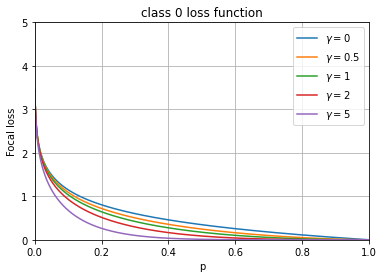

In [22]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("Focal loss")
plt.title("class 0 loss function")
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.legend()
plt.grid()

#### class 1 loss function

In [10]:
y_true = np.asarray([0., 1.])
num_samples = p.shape[0]
focal_loss = np.zeros((num_samples, 5))
for i, _p in enumerate(p):
    y_pred = np.asarray([_p, 1-_p])
    focal_loss[i, 0] = fl_0(y_true, y_pred)
    focal_loss[i, 1] = fl_0_5(y_true, y_pred)
    focal_loss[i, 2] = fl_1(y_true, y_pred)
    focal_loss[i, 3] = fl_2(y_true, y_pred)
    focal_loss[i, 4] = fl_5(y_true, y_pred)

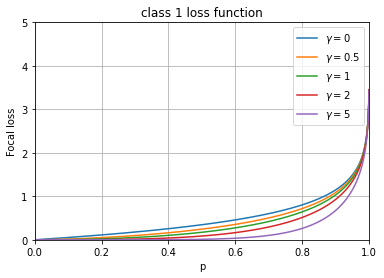

In [11]:
plt.plot(p, focal_loss[:,0], label="$\gamma=0$")
plt.plot(p, focal_loss[:,1], label="$\gamma=0.5$")
plt.plot(p, focal_loss[:,2], label="$\gamma=1$")
plt.plot(p, focal_loss[:,3], label="$\gamma=2$")
plt.plot(p, focal_loss[:,4], label="$\gamma=5$")
plt.xlabel("p")
plt.ylabel("Focal loss")
plt.title("class 1 loss function")
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.legend()
plt.grid()

## Test gamma $\gamma$

In [16]:
gamma = 0.1
fl_0 = BinaryFocalLoss(alpha=0.25, gamma=gamma)

In [17]:
y_true = np.asarray([1., 0.])
y_pred = np.asarray([0., 1.])
fl_0(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=inf>